# Unlock the Power of Text Summarization: How to Condense Lengthy Texts in Minutes
> Author: Tiexing Wang

Text summarization condenses a text while preserving key information.
Two types:
- Abstractive summarization generates a new text using semantic understanding.
- Extractive summarization selects important sentences.

- Extractive methods often yield better results compared to abstractive methods.
- Challenges of abstractive methods include semantic representation and natural language generation.

- [Cosine similarity](https://www.geeksforgeeks.org/cosine-similarity/) measures sentence similarity, with a smaller angle indicating higher similarity.

## Here is the code flow to generate summarize text


1. Input article
2. Split into sentences
3. Remove stop words
4. Build a similarity matrix
5. Generate rank based on matrix
6. Pick top N sentences for summary

**The other purpose for developing this text summarizer is that I want to test if my abstract is concise**

## TextSummarizer Class Theory

The `TextSummarizer` class implements an extractive text summarization approach using the PageRank algorithm and sentence similarity. Here's a step-by-step overview of the underlying theory:

1. **Reading and Preprocessing**: The `read_article` method reads an article from a file and preprocesses it by splitting it into sentences and cleaning them.

2. **Sentence Similarity**: The `sentence_similarity` method calculates the similarity between two sentences based on their word frequencies. It uses the cosine distance metric to measure the similarity.

3. **Similarity Matrix**: The `build_similarity_matrix` method constructs a similarity matrix that represents pairwise similarity between sentences. It iterates over all pairs of sentences, calculates their similarity using `sentence_similarity`, and fills the matrix accordingly.

4. **PageRank Algorithm**: The `generate_summary` method applies the PageRank algorithm to rank the sentences based on their importance in the similarity matrix. It converts the similarity matrix into a graph, computes the PageRank scores using `nx.pagerank`, and sorts the sentences based on their scores.

5. **Summary Generation**: The top-ranked sentences are selected as the summary, and they are concatenated to form the final summarized text.

6. **Visualization**: The class provides methods such as `plot_pagerank_scores` and `plot_similarity_matrix` to visualize the PageRank scores and the similarity matrix, respectively. These methods utilize the `matplotlib` library for plotting.

By combining these steps, the `TextSummarizer` class allows you to read an article, generate a summary, and visualize the PageRank scores and similarity matrix. It provides a foundation for extractive text summarization, where important sentences are selected based on their relationships in the similarity matrix, resulting in a concise and informative summary.

### Import the library

In [ ]:
from nltk.corpus import stopwords 
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
file_name = "myabstract.txt"

In [ ]:
class TextSummarizer:
    def __init__(self):
        self.stop_words = stopwords.words('english')

    def read_article(self, file_name):
        """
        Read and preprocess an article from a file.

        Args:
            file_name (str): The name of the file to be read.

        Returns:
            list: A list of processed sentences from the article.
        """
        file = open(file_name, "r")
        filedata = file.readlines()
        article = filedata[0].split(". ")
        sentences = []

        for sentence in article:
            print(sentence)
            sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
        sentences.pop()

        return sentences

    def sentence_similarity(self, sent1, sent2, stopwords=None):
        """
        Calculate the similarity between two sentences based on their word frequencies.

        Args:
            sent1 (list): The first sentence as a list of words.
            sent2 (list): The second sentence as a list of words.
            stopwords (list, optional): A list of stopwords to be ignored. Defaults to None.

        Returns:
            float: The similarity score between the two sentences.
        """
        if stopwords is None:
            stopwords = []

        sent1 = [w.lower() for w in sent1]
        sent2 = [w.lower() for w in sent2]

        all_words = list(set(sent1 + sent2))

        vector1 = [0] * len(all_words)
        vector2 = [0] * len(all_words)

        # build the vector for the first sentence
        for w in sent1:
            if w in stopwords:
                continue
            vector1[all_words.index(w)] += 1

        # build the vector for the second sentence
        for w in sent2:
            if w in stopwords:
                continue
            vector2[all_words.index(w)] += 1

        return 1 - cosine_distance(vector1, vector2)

    def build_similarity_matrix(self, sentences, stop_words):
        """
          Build a similarity matrix based on the sentences and stop words.

          Args:
            sentences (list): A list of sentences.
            stop_words (list): A list of stop words to be ignored.

        Returns:
          numpy.ndarray: A similarity matrix representing the pairwise similarity between sentences.
        """
        # Create an empty similarity matrix
        similarity_matrix = np.zeros((len(sentences), len(sentences)))

        for idx1 in range(len(sentences)):
            for idx2 in range(len(sentences)):
                if idx1 == idx2:  # ignore if both are the same sentences
                    continue
                similarity_matrix[idx1][idx2] = self.sentence_similarity(
                    sentences[idx1], sentences[idx2], stop_words
                )

        return similarity_matrix

    def generate_summary(self, file_name, top_n=5, do_plot=False):
        summarize_text = []

        # Step 1 - Read text and split it
        sentences = self.read_article(file_name)

        # Step 2 - Generate Similarity Matrix across sentences
        sentence_similarity_matrix = self.build_similarity_matrix(
            sentences, self.stop_words
        )

        if do_plot:
          self.plot_similarity_matrix(sentence_similarity_matrix)
          
        # Step 3 - Rank sentences in similarity matrix
        sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
        scores = nx.pagerank(sentence_similarity_graph)

        if do_plot:
          self.plot_pagerank_scores(scores)

        # Step 4 - Sort the rank and pick top sentences
        ranked_sentences = sorted(
            ((scores[i], s) for i, s in enumerate(sentences)), reverse=True
        )
        print("Indexes of top ranked sentences in order are: ", ranked_sentences)

        for i in range(top_n):
            summarize_text.append(" ".join(ranked_sentences[i][1]))

        # Step 5 - Output the summarized text
        summarized_text = ". ".join(summarize_text)
        print("Summarized Text:\n", summarized_text)

        return summarized_text

    def plot_pagerank_scores(self, scores):
        """
        Plot the pagerank scores.

        Args:
            scores (dict): A dictionary containing the pagerank scores for each sentence.
        """
        sentence_indices = list(scores.keys())
        pagerank_scores = list(scores.values())

        plt.bar(sentence_indices, pagerank_scores, align='center')
        plt.xlabel('Sentence Index')
        plt.ylabel('Pagerank Score')
        plt.title('Pagerank Scores for Sentences')
        plt.show()

    def plot_similarity_matrix(self, similarity_matrix):
        """
        Plot the similarity matrix.

        Args:
            similarity_matrix (numpy.ndarray): The similarity matrix representing pairwise similarity between sentences.
        """
        plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
        plt.title('Similarity Matrix')
        plt.xlabel('Sentence Index')
        plt.ylabel('Sentence Index')
        plt.colorbar()
        plt.show()

In vibrator technology, the presence of harmonics is a common phenomenon
Several authors considered the problem of removing or utilizing harmonics from land vibrator data
However, marine vibrator (MV) harmonics are rarely discussed
 Although much weaker than the fundamental frequency signal, we show that the MV harmonics can in principle be used for broadening the frequency band of interest for subsurface imaging
Utilization is enabled by a highly reliable MV source capable of producing high-fidelity repeatable sweeps and by a high-fidelity source signature estimator
 


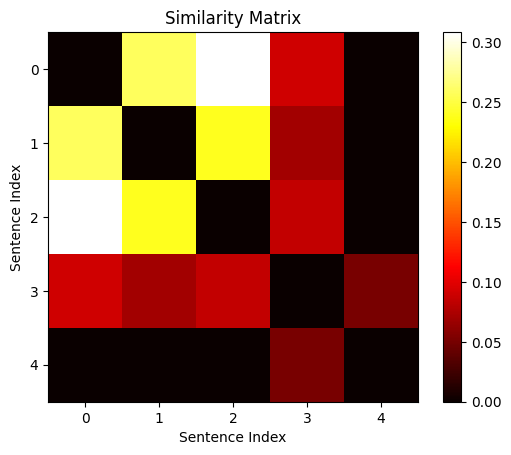

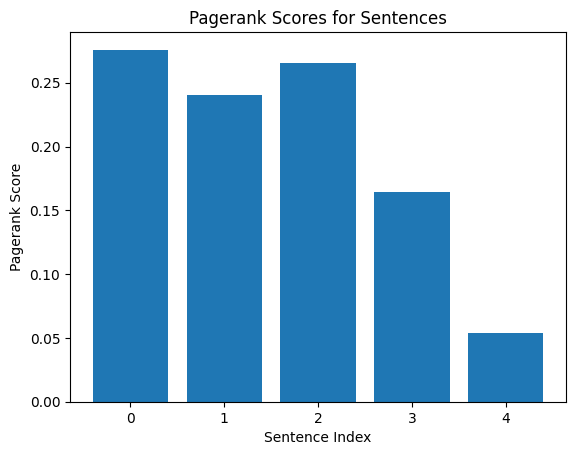

Indexes of top ranked sentences in order are:  [(0.2758668746660296, ['In', 'vibrator', 'technology,', 'the', 'presence', 'of', 'harmonics', 'is', 'a', 'common', 'phenomenon']), (0.2655674626430389, ['However,', 'marine', 'vibrator', '(MV)', 'harmonics', 'are', 'rarely', 'discussed']), (0.24047024529743563, ['Several', 'authors', 'considered', 'the', 'problem', 'of', 'removing', 'or', 'utilizing', 'harmonics', 'from', 'land', 'vibrator', 'data']), (0.16407305814341638, ['', 'Although', 'much', 'weaker', 'than', 'the', 'fundamental', 'frequency', 'signal,', 'we', 'show', 'that', 'the', 'MV', 'harmonics', 'can', 'in', 'principle', 'be', 'used', 'for', 'broadening', 'the', 'frequency', 'band', 'of', 'interest', 'for', 'subsurface', 'imaging']), (0.05402235925007968, ['Utilization', 'is', 'enabled', 'by', 'a', 'highly', 'reliable', 'MV', 'source', 'capable', 'of', 'producing', 'high-fidelity', 'repeatable', 'sweeps', 'and', 'by', 'a', 'high-fidelity', 'source', 'signature', 'estimator'])]


In [ ]:
# Create an instance of the TextSummarizer class
summarizer = TextSummarizer()

# Specify the file name and the number of top sentences for the summary
top_n = 2

# Generate the summary using the TextSummarizer instance
summary = summarizer.generate_summary(file_name, top_n, True)


## So, what is the difference between the textsummarizer and chatGPT?

The `TextSummarizer` class provided is a custom implementation of a text summarizer. It follows a specific algorithm to generate a summary of an article:

1. It reads and preprocesses an article from a file, splitting it into sentences.
2. It calculates the similarity between sentences based on their word frequencies.
3. It builds a similarity matrix representing the pairwise similarity between sentences.
4. It ranks the sentences using PageRank algorithm based on the similarity matrix.
5. It selects the top-ranked sentences and concatenates them to generate the summarized text.

The class also includes additional methods to plot the similarity matrix and the PageRank scores.

On the other hand, ChatGPT, the language model you are interacting with, is a large-scale pre-trained model developed by OpenAI. It is trained on a wide variety of internet text and can generate responses to prompts or questions by leveraging the knowledge it has learned from the training data.

**Important Note:** The `TextSummarizer` class is a specific implementation with its own algorithm and functionality, while ChatGPT is a more general language model capable of various tasks, including text summarization. However, the specific implementation details and algorithm used by ChatGPT for text summarization are not provided in the code you shared.